# Working on Iris Dataset with Pandas

In [3]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Load Iris dataset

In [2]:
iris = datasets.load_iris()

In [13]:
pd

print(iris.keys())
iris["feature_names"]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]), columns=["a", "b", "c"])


['sepal length', 'sepal width', 'petal length', 'petal width']

In [136]:
data_frame = pd.DataFrame(iris['data'], 
                          columns=list(map(
                              lambda x: " ".join(x.split(" ")[0:2]),
                              iris["feature_names"])))
data_frame["target"] = iris["target_names"][iris["target"]]
display(data_frame)
data_frame.to_csv("data.csv", index=False)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [137]:
# data_frame.loc[0:10, ["sepal length", "sepal width"]]
data_frame.iloc[0:10, [0,2]]

,sepal length,petal length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


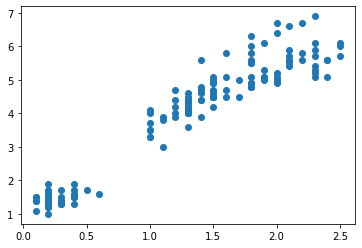

In [138]:
display(data_frame.drop("target", axis=1).corr(method="pearson"))
plt.scatter(data_frame["petal width"].array, data_frame["petal length"].array)

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  7.,  0.,  0.,
        13.,  0.,  0., 13.,  0.,  0.,  0.,  7.,  0.,  0.,  4.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([1.  , 1.03, 1.06, 1.09, 1.12, 1.15, 1.18, 1.21, 1.24, 1.27, 1.3 ,
        1.33, 1.36, 1.39, 1.42, 1.45, 1.48, 1.51, 1.54, 1.57, 1.6 , 1.63,
        1.66, 1.69, 1.72, 1.75, 1.78, 1.81, 1.84, 1.87, 1.9 ]),
 <BarContainer object of 30 artists>)

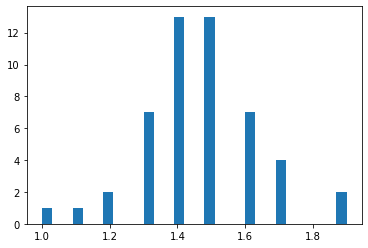

In [177]:
plt.hist(data_frame[data_frame.target=="setosa"]["petal length"], bins=30)

In [140]:
from scipy.stats import norm
help(norm.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



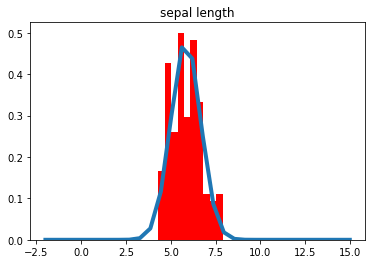

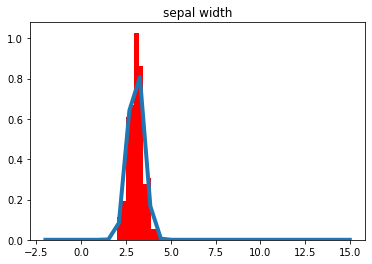

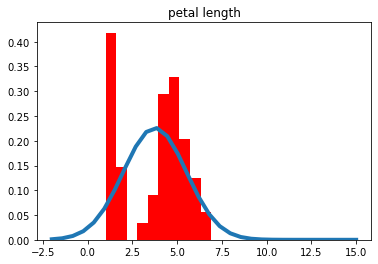

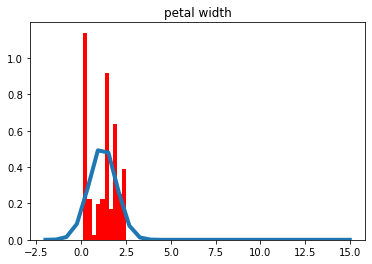

In [158]:
for k in data_frame[data_frame.target == "vericolor"].drop("target", axis=1).keys():
    mu = data_frame[k].mean()
    sigma = data_frame[k].std(ddof=1)

    pts = np.linspace(-2, 15, 30)
    plt.title(k)
    plt.plot()
    plt.plot(pts, norm.pdf(pts, loc=mu, scale=sigma), lw=4)
    plt.hist(data_frame[k], bins=10, density=True, color="red", cumulative=False)
    plt.show()

setosa
versicolor
virginica


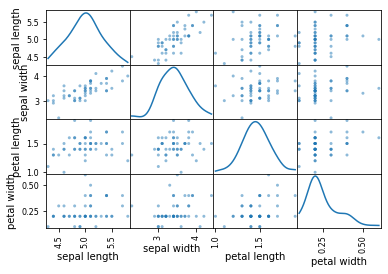

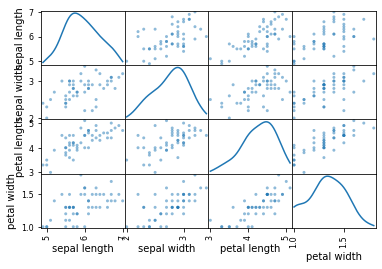

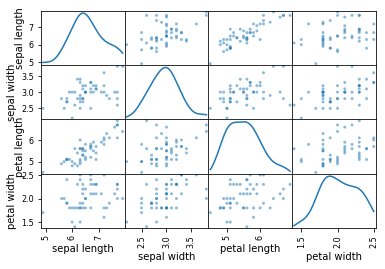

# Exercise 1

In [143]:
plt.close("all")

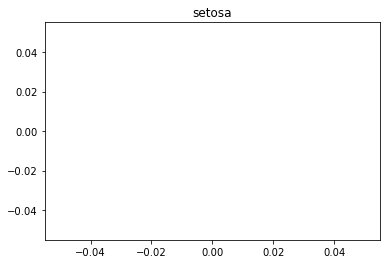

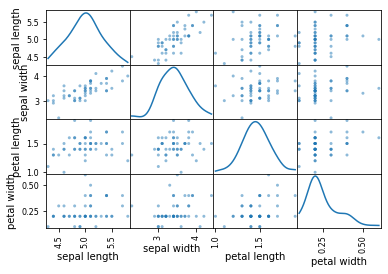

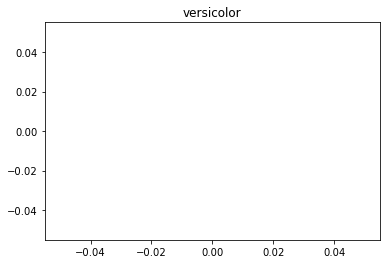

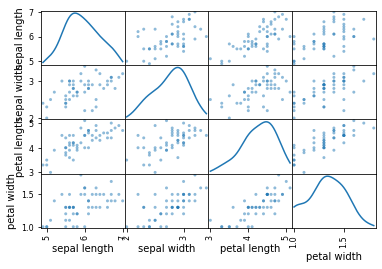

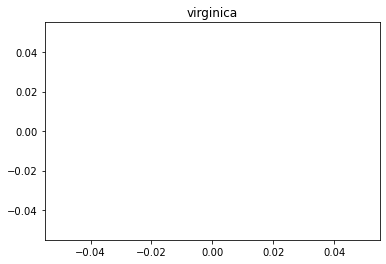

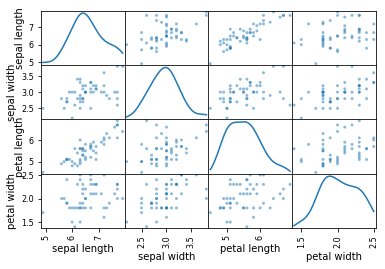

In [187]:
from pandas.plotting import scatter_matrix
for n in iris["target_names"]:
    plt.plot()
    plt.title(n)
    scatter_matrix(data_frame[data_frame.target==n], diagonal="kde")
    plt.show()

# Challenge

In [4]:
df = pd.read_csv("subjecta-concentrating-1.csv").drop("Right AUX", axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import utils

In [6]:
df.timestamps = pd.to_datetime(df["timestamps"], unit='s', origin='unix')
df.describe()

,TP9,AF7,AF8,TP10
count,15192.000000,15192.000000,15192.000000,15192.000000
mean,37.435923,32.128337,-24.929599,15.277019
std,27.892849,10.549507,160.286413,27.026038
min,-207.031000,-36.133000,-499.023000,-219.727000
25%,25.879000,26.367000,-138.184000,3.418000
50%,38.086000,31.738000,-40.039000,17.090000
75%,50.781000,37.598000,61.523000,27.832000
max,159.180000,111.816000,720.215000,138.672000


In [7]:
sensors = ["TP9", "AF7", "AF8"]
# df["TP9"].rolling(window=250).mean().head(350)
# print(l)
# for l in labels:
#     plt.plot()
#     plt.title(l + " mean")
#     df[l].rolling(window=250).mean().plot()
#     plt.show()
#     
#     plt.plot()
#     plt.title(l + " std")
#     df[l].rolling(window=250).std(ddof=1).plot()
#     plt.show()

In [8]:
scatter_matrix(df.drop("Right AUX", axis=1), diagonal="kde")

NameError: name 'scatter_matrix' is not defined

In [9]:
subjects = ["a", "b"]
states = ["neutral", "concentrating", "relaxed"]
"""
data = {
    "relaxed": {
        "TP9": {
            means: [...],
            std: [...],
            kutosis: [...],
            min: [...]
            max: [...]
            variance: [...]
            df: pd.DataFrame
        }
    },
    "concentrating": {
        ...
    }
}

in: [$mean, $std, $kutosis, $min, $max, $variance]

out: one hot encoding
"""

'\ndata = {\n    "relaxed": {\n        "TP9": {\n            means: [...],\n            std: [...],\n            kutosis: [...],\n            min: [...]\n            max: [...]\n            variance: [...]\n            df: pd.DataFrame\n        }\n    },\n    "concentrating": {\n        ...\n    }\n}\n\nin: [$mean, $std, $kutosis, $min, $max, $variance]\n\nout: one hot encoding\n'

In [62]:
# plt.plot(data["neutral"]["TP9"]["mean"])

s = pd.Series([10, 0, 0.002, 10, 1000, 10, 10000])
s.apply(lambda x: -x * np.log(x)).rolling(window=2).sum()

0             NaN
1             NaN
2             NaN
3      -23.013422
4    -6930.781130
5    -6930.781130
6   -92126.429571
dtype: float64

In [53]:
import itertools

data = {}

def proc(df):
    onesec = 96
    ret = {}
    for s in sensors:
        r = df[s].rolling(window=onesec)
        if s not in ret.keys():
            ret[s] = {
                "mean": np.array([]),
                "std": np.array([]),
                "kutosis": np.array([]),
                "min": np.array([]),
                "max": np.array([]),
                "entropy": np.array([]),
            }
        ret[s]["mean"] = np.append(ret[s]["mean"], r.mean()[onesec-1:])
        ret[s]["std"] = np.append(ret[s]["std"], r.std(ddof=1)[onesec-1:])
        ret[s]["kutosis"] = np.append(ret[s]["kutosis"], r.kurt()[onesec-1:])
        ret[s]["min"] = np.append(ret[s]["min"], r.min()[onesec-1:])
        ret[s]["max"] = np.append(ret[s]["max"], r.max()[onesec-1:])
        ent = df[s].apply(lambda x: -x * np.log(max(x, -900))).rolling(window=onesec).sum()[onesec-1:]
        print(df[s].apply(lambda x: -x * np.log(x)))
        print(df[s].apply(lambda x: -x * np.log(x)).rolling(window=20).sum()[20:])
        ret[s]["entropy"] = np.append(ret[s]["entropy"], ent)
    return ret

for subject, state in itertools.product(subjects, states):
    df = pd.read_csv(f"data/original_data/subject{subject}-{state}-1.csv")
    df.timestamps = pd.to_datetime(df["timestamps"], unit='s', origin='unix')
    
    if state not in data.keys():
        data[state] = {"df": pd.DataFrame()}
    data[state].update(proc(df))
    data[state]["df"] = data[state]["df"].append(df)
data

0         -7.743265
1        -58.046190
2        -61.950875
3       -103.238687
4        -80.058638
            ...    
15199    -78.006557
15200    -59.994570
15201    -28.842937
15202    -34.001588
15203    -90.467545
Name: TP9, Length: 15204, dtype: float64
20      -1485.668458
21      -1448.287141
22      -1444.382455
23      -1450.878370
24      -1467.637788
            ...     
15199            NaN
15200            NaN
15201            NaN
15202            NaN
15203            NaN
Name: TP9, Length: 15184, dtype: float64
0        -71.905513
1        -69.893701
2        -58.046190
3        -37.529963
4        -69.893701
            ...    
15199    -90.467545
15200   -101.090436
15201   -103.238687
15202   -103.238687
15203   -107.563106
Name: AF7, Length: 15204, dtype: float64
20      -1539.740761
21      -1522.130637
22      -1520.198447
23      -1540.714674
24      -1530.815543
            ...     
15199   -2043.499455
15200   -2045.639710
15201   -2041.315291
15202   -2058.278

{'neutral': {'df':                          timestamps     TP9     AF7     AF8    TP10  Right AUX
  0     2018-07-31 17:29:59.795000064   4.883  22.949   8.789  23.926     35.156
  1     2018-07-31 17:29:59.799000064  19.531  22.461   5.371  28.320     66.406
  2     2018-07-31 17:29:59.803000064  20.508  19.531  11.230  25.391     33.691
  3     2018-07-31 17:29:59.806999808  30.273  14.160  21.484  37.109    -31.250
  4     2018-07-31 17:29:59.811000064  24.902  22.461  16.602  38.086     32.715
  ...                             ...     ...     ...     ...     ...        ...
  15211 2018-07-31 17:33:20.196000000  23.438  40.527  49.316  19.043     74.219
  15212 2018-07-31 17:33:20.200000000  37.109  38.574  50.293  21.973     86.426
  15213 2018-07-31 17:33:20.204000000  32.227  41.016  55.176  26.855     72.754
  15214 2018-07-31 17:33:20.207000064  16.113  38.086  55.176  25.391     49.316
  15215 2018-07-31 17:33:20.211000064   6.348  33.691  54.688  14.648     93.750
  
  [30420

In [37]:
ks = list(data["neutral"]["TP9"].keys())

cat_to_int = {}
for i, s in enumerate(states):
    cat_to_int[s] = i
print(cat_to_int)
def data_to_np_array(dat):
    out = np.array([]).reshape(len(dat["TP9"]["mean"]), -1)
    for sensor, dat2 in dat.items():
        if sensor == "df":
            continue
        for measure, dat3 in dat2.items():
            out = np.concatenate((out, dat3.reshape(-1, 1)), 1)
    return out.T

train_x = np.array([]).reshape(len(sensors) * len(ks), 0)
train_y = []
for state_k in data.keys():
    l = len(data[state_k]["TP9"]["mean"])
    xx = data_to_np_array(data[state_k])
    train_x = np.concatenate((train_x, xx), 1)
    train_y.extend([cat_to_int[state_k]] *xx.shape[1])
train_y = np.array(train_y)
train_x = train_x.T

train_x, train_y = utils.shuffle(train_x, train_y)
train_x

{'neutral': 0, 'concentrating': 1, 'relaxed': 2}


array([[ 1.39821354e+01,  2.03214701e+01, -5.29728800e-01, ...,
         7.81200000e+00,  3.36910000e+01,             nan],
       [ 3.11024896e+01,  7.69114211e+01, -4.29826459e-01, ...,
        -3.32520000e+02,  9.54102000e+02,             nan],
       [ 2.02432917e+01,  1.44737244e+01, -4.30619263e-01, ...,
        -4.39500000e+00,  5.22460000e+01,             nan],
       ...,
       [ 2.45513750e+01,  1.51266380e+01, -1.21705425e+00, ...,
        -1.95300000e+00,  3.66210000e+01,             nan],
       [ 3.27148125e+01,  1.14372328e+01, -5.90717579e-01, ...,
        -4.91699000e+02,  4.22363000e+02,             nan],
       [ 2.62451563e+01,  1.87067388e+01, -1.09147941e+00, ...,
         1.85550000e+01,  5.66410000e+01,             nan]])

In [32]:
# scaler = StandardScaler().fit(train_x)
# train_x_scaled = scaler.transform(train_x)
# plt.plot(train_x[3, :])
# plt.plot(data["neutral"]["TP9"]["std"])
print(train_x.shape)
print(train_y.shape)
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver="newton-cg"), verbose=True)
pipe.fit(train_x, train_y)

(41499, 18)
(41499,)
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

(array([11163.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3958.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

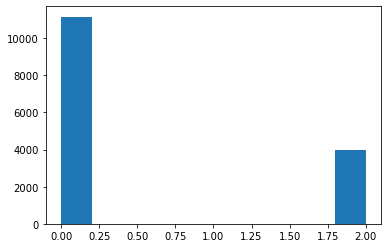

In [19]:
#test_df = pd.read_csv("data/test/1sec.csv").drop("Right AUX", axis=1)
test_df = pd.read_csv("data/original_data/subjectc-relaxed-2.csv").drop("Right AUX", axis=1)
test_df.timestamps = pd.to_datetime(df["timestamps"], unit='s', origin='unix')
x = data_to_np_array(proc(test_df)).T
res = pipe.predict(x)
plt.hist(res)